# N.P.S.S. Rupasinghe - 210549D
## EN3160 Assignment 3 on Neural Networks
## GitHub Link - https://github.com/SanujaRupasinghe/Image-Processign-And-Machine-Vision-Assignments/tree/main/Assignment3

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
from torchvision.datasets.utils import download_and_extract_archive
import time
import os
import copy

In [3]:
cuda_available = torch.cuda.is_available()
gpu_name = torch.cuda.get_device_name(0) if cuda_available else "No GPU available"
print(f"CUDA Available: {cuda_available}")
print(f"GPU Name: {gpu_name}")

CUDA Available: True
GPU Name: NVIDIA GeForce MX250


# Q1

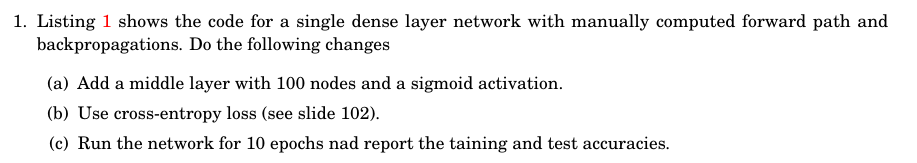

## Loading and Preprocessing the CIFAR-10 Dataset
 
this dataset contains 10 classses of images, each resized to 32x32 pixels and 3 colour channels

In [30]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [06:10<00:00, 459835.65it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Defining the DenseNet Model

The Network architecture is 
1. Input layer: input size 32x32x3 images
2. Hidden layer: Hidden layer coontains 100 nodes and sigmoid activation
3. Output layer: contains 10 nodes corresponding to 10 classes of the dataset

In [4]:
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 100)
        self.fc2 = nn.Linear(100, 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten input
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

net = DenseNet()

## Defining Loss Function and Optimizer

Loss Function: Cross Entropy Loss             
Optimizer: Stochastic Gradient Descent (SGD)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Training the Model (10 epochs)

In [7]:
lossHistory = []

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")
    lossHistory.append(running_loss / len(trainloader))

Epoch 1, Loss: 1.5281388096809387
Epoch 2, Loss: 1.4858244388103485
Epoch 3, Loss: 1.4481692979335785
Epoch 4, Loss: 1.4157750597596168
Epoch 5, Loss: 1.3827905995845795
Epoch 6, Loss: 1.3525626794695855
Epoch 7, Loss: 1.3244896228909493
Epoch 8, Loss: 1.2983281452655793
Epoch 9, Loss: 1.2728201203346252
Epoch 10, Loss: 1.2484825713038445


## Evaluating the Model

Training Accuracy: 58.962%
Test Accuracy: 48.98%


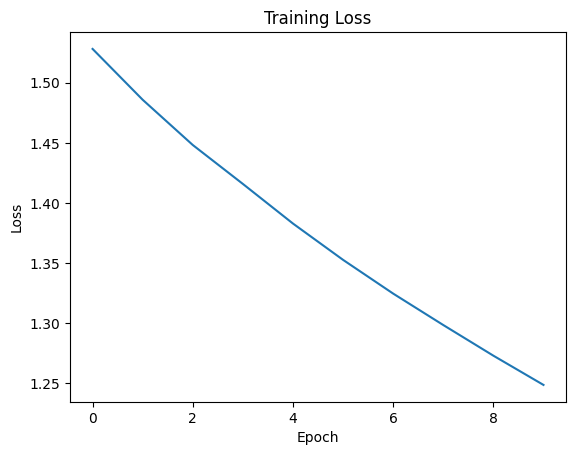

In [ ]:
def calculate_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

print(f"Training Accuracy: {calculate_accuracy(trainloader, net)}%")
print(f"Test Accuracy: {calculate_accuracy(testloader, net)}%")


plt.plot(lossHistory)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Q2

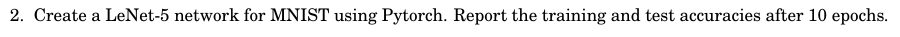

## Data Loading

applying transformations to convert images to tensors and normalize them. The training and test datasets are downloaded and preprocessed with the specified transformations.           

DataLoaders are used to batch and shuffle the training data while loading the test data without shuffling. The datasets are ready for use in model training and evaluation.

In [32]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

## Define LeNet-5

1. Convolutional Layers: Two convolutional layers (conv1 with 6 filters and conv2 with 16 filters) extract features from the input image.
   
2. Fully Connected Layers: Three fully connected layers (fc1, fc2, fc3) progressively reduce the dimensions to output class predictions.

3. Activation Functions: ReLU activation is applied after each convolutional and fully connected layer, except the final output layer, which provides the class scores.

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = LeNet5()

## Create the network, loss function, and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Training Loop

In [19]:
lossHistory = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")
    lossHistory.append(running_loss / len(trainloader))

Epoch 1, Loss: 0.031032480643630258
Epoch 2, Loss: 0.026747279995017307
Epoch 3, Loss: 0.023302047181213502
Epoch 4, Loss: 0.02093320400029337
Epoch 5, Loss: 0.01763631874251075
Epoch 6, Loss: 0.015645337530706946
Epoch 7, Loss: 0.014471996399378866
Epoch 8, Loss: 0.01176667094349658
Epoch 9, Loss: 0.011563556197335415
Epoch 10, Loss: 0.010485651169626698


Training Accuracy: 99.63%
Test Accuracy: 98.71%


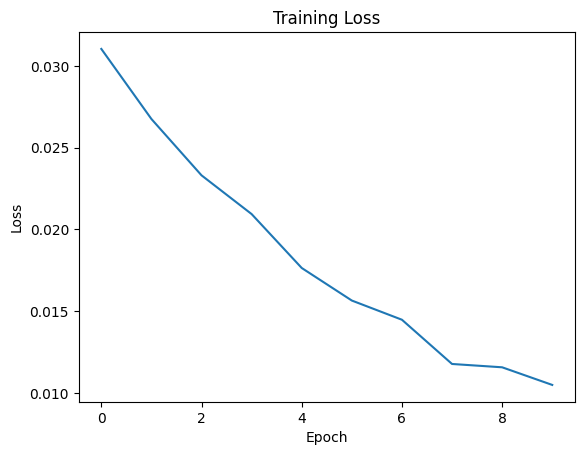

In [20]:
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

print(f"Training Accuracy: {calculate_accuracy(trainloader, net)}%")
print(f"Test Accuracy: {calculate_accuracy(testloader, net)}%")

plt.plot(lossHistory)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# Q3

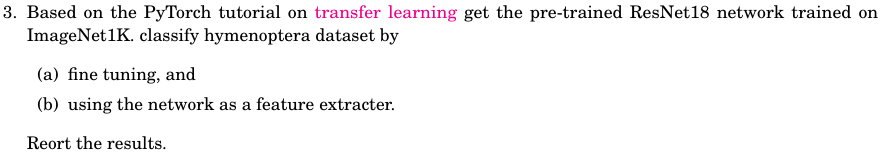

## Load and Transform Data

Downloads and extracts the "Hymenoptera" dataset, which contains images of ants and bees, and applies data transformations for training and validation.

In [40]:
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
data_dir = "data_3/hymenoptera_data"  # Target directory for dataset

# Download and extract the dataset
download_and_extract_archive(url, download_root='data_3', extract_root='data_3', filename='hymenoptera_data.zip')

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,shuffle=True, num_workers=4)for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Using downloaded and verified file: data_3\hymenoptera_data.zip
Extracting data_3\hymenoptera_data.zip to data_3


## Fine-Tuning the ResNet18 Model

This code loads a pretrained ResNet-18 model, modifies the final layer for classification with the number of classes in the dataset

In [ ]:
# Load pretrained model
model_ft = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler
from torch.optim import lr_scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


## Train the Model

In [42]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Train the fine-tuned model
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.6518 Acc: 0.6762
val Loss: 0.2366 Acc: 0.9216

Epoch 1/9
----------
train Loss: 0.6230 Acc: 0.7582
val Loss: 0.2310 Acc: 0.9020

Epoch 2/9
----------
train Loss: 0.5553 Acc: 0.7623
val Loss: 0.2541 Acc: 0.9085

Epoch 3/9
----------
train Loss: 0.6025 Acc: 0.7418
val Loss: 0.2979 Acc: 0.8954

Epoch 4/9
----------
train Loss: 0.5275 Acc: 0.7951
val Loss: 0.2586 Acc: 0.9020

Epoch 5/9
----------
train Loss: 0.6520 Acc: 0.7910
val Loss: 0.8884 Acc: 0.7647

Epoch 6/9
----------
train Loss: 0.5813 Acc: 0.8279
val Loss: 0.5042 Acc: 0.8497

Epoch 7/9
----------
train Loss: 0.4077 Acc: 0.8443
val Loss: 0.3881 Acc: 0.8693

Epoch 8/9
----------
train Loss: 0.3768 Acc: 0.8484
val Loss: 0.3240 Acc: 0.8889

Epoch 9/9
----------
train Loss: 0.3720 Acc: 0.8484
val Loss: 0.2888 Acc: 0.8889

Training complete in 7m 25s
Best val Acc: 0.9216


## Feature Extraction

To use ResNet18 as a feature extractor, freeze its layers and replace the final layer

In [43]:
# Load pretrained model
model_conv = models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Replace the final layer
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))
model_conv = model_conv.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Train the feature extractor
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.7766 Acc: 0.6270
val Loss: 0.1922 Acc: 0.9412

Epoch 1/9
----------
train Loss: 0.4822 Acc: 0.7910
val Loss: 0.1686 Acc: 0.9477

Epoch 2/9
----------
train Loss: 0.5765 Acc: 0.7295
val Loss: 0.1789 Acc: 0.9412

Epoch 3/9
----------
train Loss: 0.5964 Acc: 0.7582
val Loss: 0.1755 Acc: 0.9346

Epoch 4/9
----------
train Loss: 0.4542 Acc: 0.8033
val Loss: 0.1851 Acc: 0.9412

Epoch 5/9
----------
train Loss: 0.6791 Acc: 0.7172
val Loss: 0.2043 Acc: 0.9346

Epoch 6/9
----------
train Loss: 0.3261 Acc: 0.8525
val Loss: 0.2187 Acc: 0.9346

Epoch 7/9
----------
train Loss: 0.3965 Acc: 0.8033
val Loss: 0.2213 Acc: 0.9150

Epoch 8/9
----------
train Loss: 0.5121 Acc: 0.7951
val Loss: 0.1930 Acc: 0.9412

Epoch 9/9
----------
train Loss: 0.5903 Acc: 0.7746
val Loss: 0.2206 Acc: 0.9477

Training complete in 5m 3s
Best val Acc: 0.9477


## Evaluate and Report Results

In [44]:
# Evaluate the fine-tuned model
def evaluate_model(model, dataloaders, phase='val'):
    model.eval()
    corrects = 0
    with torch.no_grad():
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels.data)
    accuracy = corrects.double() / dataset_sizes[phase]
    print(f'{phase} Accuracy: {accuracy:.4f}')

print("Fine-tuned Model Results:")
evaluate_model(model_ft, dataloaders)

print("\nFeature Extractor Model Results:")
evaluate_model(model_conv, dataloaders)

Fine-tuned Model Results:
val Accuracy: 0.9216

Feature Extractor Model Results:
val Accuracy: 0.9477
